## GROUP (51 TO 100) Assignment-1

###               Group 079

    2020fc04101 : Amal Shaji
    2020fc04102 : Gnaneswar SV Vijjapu
    2020fc04103 : Umang Mishra
    
    Dataset : twitter_sentiment_analysis

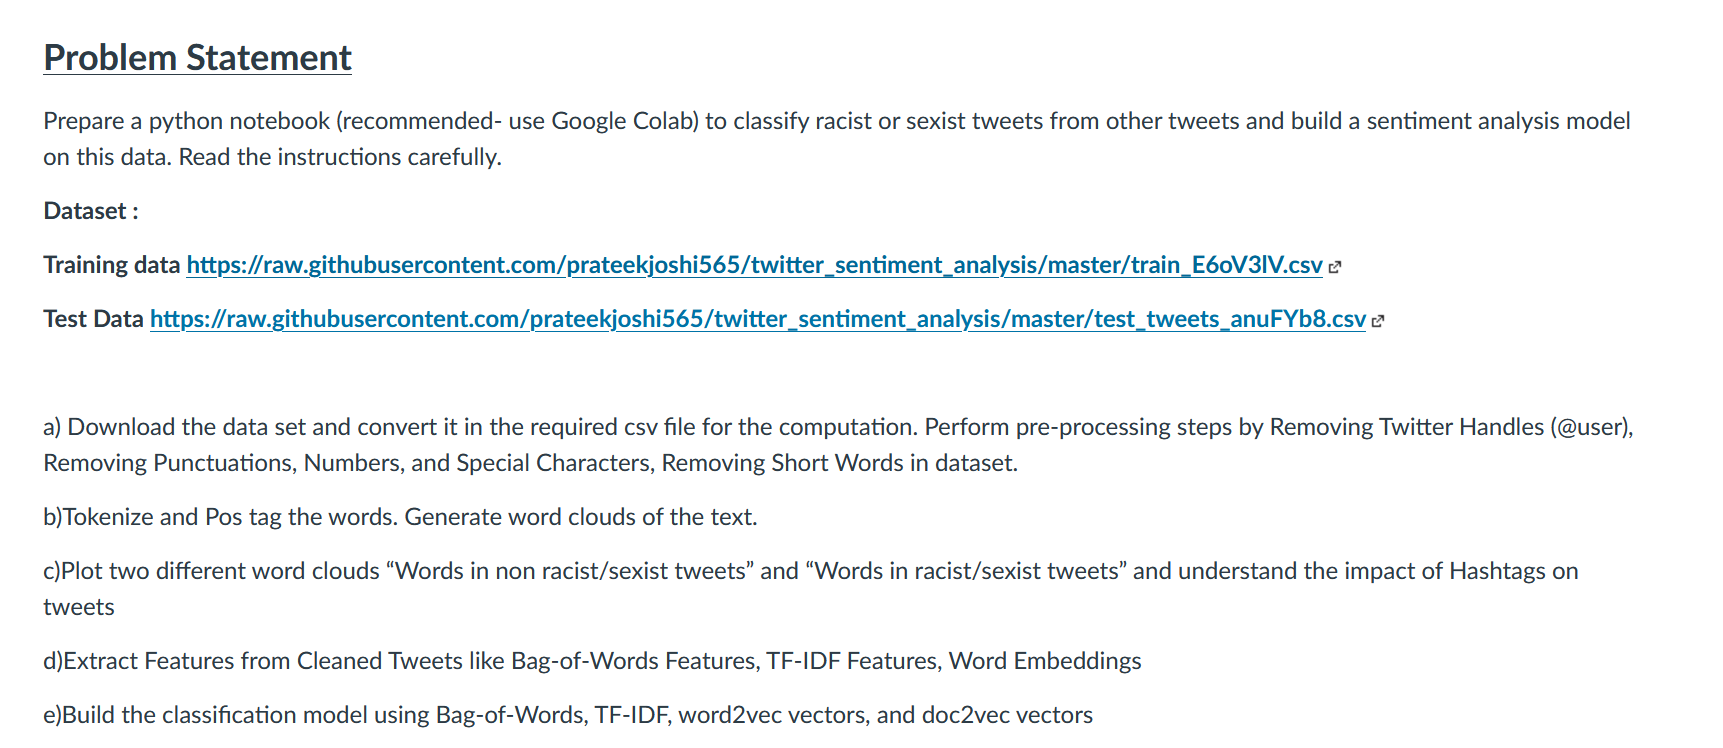

In [1]:
#imports
import pandas as pd
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import sklearn
import wordcloud
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amals\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amals\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amals\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
print("-----VERSIONS-----")
print("Pandas     :",pd.__version__)
print("Numpy      :",np.__version__)
print("Seaborn    :",sns.__version__)
print("NLTK       :",nltk.__version__)
print("Gensim     :",gensim.__version__)
print("Spacy      :",spacy.__version__)
print("Sklearn    :",sklearn.__version__)
print("Word cloud :",wordcloud.__version__)

-----VERSIONS-----
Pandas     : 1.1.3
Numpy      : 1.19.1
Seaborn    : 0.11.0
NLTK       : 3.5
Gensim     : 4.1.2
Spacy      : 3.2.2
Sklearn    : 0.23.2
Word cloud : 1.8.1


The above mentioned versions are highly recommended for the dependencies used in this notebook.

## Appendix

This part consist of all the general functions which can be commonly used in multiple approaches.

In [3]:
#Below function calculate the Accuracy, Precision and recall
def accuracy_measurement(y_valid,pred_cv):
    # Measuring accuracy on Validation Data
    print(metrics.classification_report(y_valid, pred_cv))
    print(metrics.confusion_matrix(y_valid, pred_cv))
    # Printing the Overall Accuracy of the model
    F1_Score=metrics.f1_score(y_valid, pred_cv, average='weighted')
    print('Accuracy of the model on Validation Sample Data:', round(F1_Score,2))

In [4]:
#Function for fitting,training and predicting a multinomial naive bayes classifier
def multinomial_naive_bayes(X_train,y_train,X_valid):
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    print(mnb)
    pred=mnb.predict(X_valid)
    return(pred)

In [5]:
#Function for fitting,training and predicting in a Ada boost classifier
def ada_boost_classifier(X_train,y_train,X_valid):
    # Choosing Decision Tree with 1 level as the weak learner
    DTC=DecisionTreeClassifier(max_depth=2)
    clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)

    # Printing all the parameters of Adaboost
    print(clf)

    # Creating the model on Training Data
    AB=clf.fit(X_train,y_train)
    prediction=AB.predict(X_valid)
    return(prediction)

In [6]:
#Function for fitting,training and predicting in a KNN classifier
def knn_classifier(X_train,y_train,X_valid):
    clf = KNeighborsClassifier(n_neighbors=15)
    print(clf)
    KNN=clf.fit(X_train,y_train)
    prediction=KNN.predict(X_valid)
    return(prediction)

In [7]:
#Function for fitting,training and predicting in a KNN classifier
def logistic_regression(X_train,y_train,X_valid):
    clf = LogisticRegression(C=10,penalty='l2', solver='newton-cg')
    print(clf)
    LOG=clf.fit(X_train,y_train)
    prediction=LOG.predict(X_valid)
    return(prediction)

In [8]:
#Function for fitting,training and predicting in a Decision tree classifier
def decision_tree(X_train,y_train,X_valid):
    clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')
    print(clf)
    DTree=clf.fit(X_train,y_train)
    prediction=DTree.predict(X_valid)
    return(prediction)

## Part A : Preprocessing

This part consists of the steps such as 

    *) Downloading the data set in required format
    *) Removing Twitter Handles (@user), 
    *) Removing Punctuations, Numbers, and Special Characters 
    *) Removing Stop Words in dataset.  
    *) Tokenizing
    *) Lemmatizing

In [9]:
# Reading the datasets directly from the web
df_train=pd.read_csv("https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/train_E6oV3lV.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/test_tweets_anuFYb8.csv")

In [10]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
# Dropping unneccesary id column
df_train=df_train.drop("id",axis=1)
df_test=df_test.drop("id",axis=1)

In [12]:
#Removing repeating @user tag
def remove_user(text):
    url = re.compile(r'@user')
    return url.sub(r'',text)

#Removing repeating amp word
def remove_amp(text):
    url = re.compile(r'amp')
    return url.sub(r'',text)

#Removing URL---urls present in the text
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#Removing HTML codes
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

#Function for removing Emojis, symbols etc.. if present
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


#Function for removing punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [13]:
#Applying above functons on both train and test sets
df_train['tweet']=df_train['tweet'].apply(remove_amp)
df_train['tweet']=df_train['tweet'].apply(remove_user)
df_train['tweet']=df_train['tweet'].apply(remove_URL)
df_train['tweet']=df_train['tweet'].apply(remove_html)
df_train['tweet']=df_train['tweet'].apply(remove_emoji)
df_train['tweet']=df_train['tweet'].apply(remove_punct)

df_test['tweet'] = df_test['tweet'].apply(remove_amp)
df_test['tweet'] = df_test['tweet'].apply(remove_user)
df_test['tweet'] = df_test['tweet'].apply(remove_URL)
df_test['tweet'] = df_test['tweet'].apply(remove_html)
df_test['tweet'] = df_test['tweet'].apply(remove_emoji)
df_test['tweet'] = df_test['tweet'].apply(remove_punct)

In [14]:
df_train.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i cant use cause they...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation


In [15]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

Purpose of the below function

    @ Tokenize the text.
    @ Covert to lower case letters.
    @ Remove all non alphabetic words
    @ Remove all stop words
    @ Lemmatizing the words

NB: We had a choice between stemming and Lemmatizing. When stemming is done, we found that un-meaningfull words are popping up in the wordcloud. Also the efficiency of ml model without steming and with stemming is almost same. Due to above points we decided to go with Lemmatizing alone and not do stemming.

In [16]:
def preprocess_text(text):
    # Extract all the words
    tokens = word_tokenize(text)
    # Lowercase the words
    tokens = [word.lower() for word in tokens]
    # Remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha()]
    # Remove word in the stop word
    words = [word for word in words if not word in stop_words]
    # Lematize the word
    lematized = [lemmatizer.lemmatize(word) for word in words]
    return lematized

In [17]:
#Creating new columns in the dataset for preprocessed text
df_train["preprocess_text"] = df_train.tweet.apply(preprocess_text)
df_test["preprocess_text"] = df_test.tweet.apply(preprocess_text)
df_train.head()

,label,tweet,preprocess_text
0,0,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,0,thanks for lyft credit i cant use cause they...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,0,bihday your majesty,"[bihday, majesty]"
3,0,model i love u take with u all the time in u...,"[model, love, u, take, u, time]"
4,0,factsguide society now motivation,"[factsguide, society, motivation]"


In [18]:
#Creating 2 new columns to store preprocessed text(not tokenized) as well
def join_list(tab):
    return " ".join(tab)

df_train["text_preprocessed"] = df_train["preprocess_text"].apply(join_list)
df_test["text_preprocessed"] = df_test["preprocess_text"].apply(join_list)

In [19]:
df_train.head()

,label,tweet,preprocess_text,text_preprocessed
0,0,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...
1,0,thanks for lyft credit i cant use cause they...,"[thanks, lyft, credit, cant, use, cause, dont,...",thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,"[bihday, majesty]",bihday majesty
3,0,model i love u take with u all the time in u...,"[model, love, u, take, u, time]",model love u take u time
4,0,factsguide society now motivation,"[factsguide, society, motivation]",factsguide society motivation


## Part B : Pos Tagging

POS Tagging is defined as the process of assigning one of the parts of speech to the given word in a sentence. We can say that POS tagging is a task of labelling each word in a sentence with its appropriate part of speech.

We are using "spacy", a recently released NLP library with advanced text function. Let's consider the first tweet in the dataset and try to pos tag it using spacy

In [20]:
text=df_train["tweet"][0]
print(text)
doc = nlp(text)

  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run


In [21]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

           SPACE    _SP    whitespace
when       SCONJ    WRB    wh-adverb
a          DET      DT     determiner
father     NOUN     NN     noun, singular or mass
is         AUX      VBZ    verb, 3rd person singular present
dysfunctional ADJ      JJ     adjective (English), other noun-modifier (Chinese)
and        CCONJ    CC     conjunction, coordinating
is         AUX      VBZ    verb, 3rd person singular present
so         ADV      RB     adverb
selfish    ADJ      JJ     adjective (English), other noun-modifier (Chinese)
he         PRON     PRP    pronoun, personal
drags      VERB     VBZ    verb, 3rd person singular present
his        PRON     PRP$   pronoun, possessive
kids       NOUN     NNS    noun, plural
into       ADP      IN     conjunction, subordinating or preposition
his        PRON     PRP$   pronoun, possessive
dysfunction NOUN     NN     noun, singular or mass
           SPACE    _SP    whitespace
run        VERB     VBP    verb, non-3rd person singular present


In the above output,

    1st column: The word in the sentence
    2nd column: Categories of pos assigned by spacy
    3rd column: Subcategories 
    4th column: Description of the tagged pos.

In [22]:
# Render the dependency parse immediately inside Jupyter: Using spacy's vizualization library Displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

As it is not possible the whole dataset for pos tagging due to the enormous size. We will consider the first 1000 records in the datset.The Doc.count_by() method accepts a specific token attribute as its argument, and returns a frequency count of the given attribute as a dictionary object. Keys in the dictionary are the integer values of the given attribute ID, and values are the frequency. Counts of zero are not included.

In [23]:
df_pos_tagging=df_train[1:1000][1:1000]
pos_text=' '.join(df_pos_tagging.text_preprocessed)

In [24]:
doc2 = nlp(pos_text)
# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc2.count_by(spacy.attrs.POS)
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

84. ADJ  : 1073
85. ADP  : 94
86. ADV  : 247
87. AUX  : 149
89. CCONJ: 3
90. DET  : 19
91. INTJ : 56
92. NOUN : 2981
93. NUM  : 43
94. PART : 63
95. PRON : 148
96. PROPN: 1273
97. PUNCT: 2
98. SCONJ: 24
100. VERB : 1317
101. X    : 8


The count of different categories of POS can be obtained from the text corpus as above.

## Part C : Word Clouds

This part consists the creation of 

    *) Creating 3 different corpus, one containing entire text data, then one with non racist/sexist tweets and one with racist/sexist tweets
    *) Word cloud with entire data.
    *) Word cloud for non racist/sexist tweets
    *) Word cloud for racist/sexist tweets

In [25]:
df_non_racist=df_train[(df_train["label"] ==0)]
df_racist=df_train[(df_train["label"] ==1)]
non_racist_text=' '.join(df_non_racist.text_preprocessed)
racist_text=' '.join(df_racist.text_preprocessed)
entire_text = non_racist_text + racist_text

In [26]:
print("Length of non_racist text : ",len(non_racist_text))
print("Length of racist text     : ",len(racist_text))
print("Length of entire text     : ",len(entire_text))

Length of non_racist text :  1528552
Length of racist text     :  125078
Length of entire text     :  1653630


### Wordcloud on entire text corpus

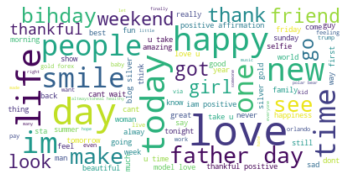

In [27]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(entire_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Words in non racist/sexist tweets

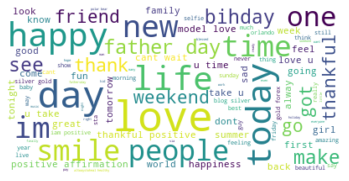

In [28]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(non_racist_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Words in racist/sexist tweets

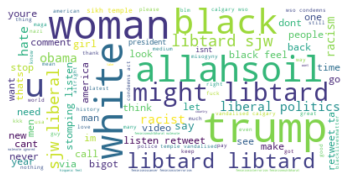

In [29]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(racist_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordclouds we can infer that the non racist/sexist tweets mainly have positive words.The words like love,smile,happy,people, life , father etc..occuring more in the wordclouds conveys the best meaning showing love and happiness.

Where as in the racist/sexist tweets we observed negetive words which shows cast,groupism, racism etc.. We can also see the names of some world renowned leaders who handled such issues in their time.

## Part D : Bag of Words, TF-IDF Feature selection and model building

This part consists of

    *) Count vectoriser (bag of words implemetation)
    *) TF-IDF Vectoriser

### Bag of words model

We can't use text as an input to our ML model. Hence, Bag of Words is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

In [30]:
df_X=df_train["text_preprocessed"]
df_Y=df_train["label"]
df_Z=df_test["text_preprocessed"]

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(df_X, df_Y, test_size=0.3)

In [32]:
#using sklearn count vectoriser class
cv=CountVectorizer()

In [33]:
#coverting train and  validation set by using count vectoriser
X_train_cv=cv.fit_transform(X_train)
X_valid_cv=cv.transform(X_valid)
X_test_cv=cv.transform(df_Z)

In [34]:
#printing bag of the words model (features)
a=X_train_cv.toarray()
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [86]:
#We aso can get the words by using inverse transform method
#cv.inverse_transform(a)

In [36]:
#length of features used in the bag of the words model
len(cv.get_feature_names())

27862

#### Model building using Multinomial Naive Bayes and Ada Boost classifier

We are using 2 well known classifiers for prediction purposes and identifying accuracy on validation set.

In [37]:
pred_cv=multinomial_naive_bayes(X_train_cv,y_train,X_valid_cv)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

MultinomialNB()
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8877
           1       0.88      0.49      0.63       712

    accuracy                           0.96      9589
   macro avg       0.92      0.74      0.81      9589
weighted avg       0.95      0.96      0.95      9589

[[8830   47]
 [ 360  352]]
Accuracy of the model on Validation Sample Data: 0.95


In [38]:
prediction=ada_boost_classifier(X_train_cv,y_train,X_valid_cv)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,prediction)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8877
           1       0.89      0.06      0.11       712

    accuracy                           0.93      9589
   macro avg       0.91      0.53      0.54      9589
weighted avg       0.93      0.93      0.90      9589

[[8872    5]
 [ 670   42]]
Accuracy of the model on Validation Sample Data: 0.9


Out of the two models ,we got highest accuracy while using Multinomial NB, 95 %

### TF-IDF Vectoriser



    TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

    IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


In [39]:
#Creating object of TFIDF Vectoriser class
tf=TfidfVectorizer(min_df=1,stop_words='english')

In [40]:
#converting training and validation data into TF-IDF format
X_train_tf=tf.fit_transform(X_train)
X_valid_tf=tf.transform(X_valid)

In [41]:
#Printing TF-IDF matrix
X_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
#printing the length of features or columns
len(tf.get_feature_names())

27681

In [43]:
pred_cv=multinomial_naive_bayes(X_train_tf,y_train,X_valid_tf)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

MultinomialNB()
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8877
           1       0.99      0.15      0.26       712

    accuracy                           0.94      9589
   macro avg       0.96      0.57      0.61      9589
weighted avg       0.94      0.94      0.91      9589

[[8876    1]
 [ 606  106]]
Accuracy of the model on Validation Sample Data: 0.91


In [44]:
prediciton=ada_boost_classifier(X_train_tf,y_train,X_valid_tf)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,prediction)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8877
           1       0.89      0.06      0.11       712

    accuracy                           0.93      9589
   macro avg       0.91      0.53      0.54      9589
weighted avg       0.93      0.93      0.90      9589

[[8872    5]
 [ 670   42]]
Accuracy of the model on Validation Sample Data: 0.9


Out of TF-IDF and Bag of the words models, we got the highest accuracy for bag of the words model. But on a large corpu s TF-IDF will out perform bag of the words model.

## Part E : Using Word2Vec and Doc2Vec for model building

This part consists of

    *) Embeddings words using gensim word 2 vec model and finding similarity between words
    *) Word2Vec vectors creation and model building
    *) Doc2Vec vectors creation and model building

In [45]:
df_train.head()

,label,tweet,preprocess_text,text_preprocessed
0,0,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...
1,0,thanks for lyft credit i cant use cause they...,"[thanks, lyft, credit, cant, use, cause, dont,...",thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,"[bihday, majesty]",bihday majesty
3,0,model i love u take with u all the time in u...,"[model, love, u, take, u, time]",model love u take u time
4,0,factsguide society now motivation,"[factsguide, society, motivation]",factsguide society motivation


We can use word2vec class from gensim library to embedd the words. This class takes the sentences as tokens. Hence we need to use "preprocess_text" column of our data frame.

In [46]:
model=gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
        )

In [47]:
model.build_vocab(df_train['preprocess_text'],progress_per=1000)

In [48]:
model.train(df_train['preprocess_text'],total_examples=model.corpus_count,epochs=model.epochs)

(1027936, 1191315)

Now the word embeddings are created and is present in the model. We can use this to find similairties amoung other words or use this vectors as an input to the machine learning model.

In [49]:
#Findings words similar to the given word
model.wv.most_similar("racist")

[('obama', 0.9963756203651428),
 ('republican', 0.9957260489463806),
 ('hillary', 0.9946122765541077),
 ('idiot', 0.9941551089286804),
 ('terrorist', 0.9938104152679443),
 ('muslim', 0.9932696223258972),
 ('remark', 0.9915075898170471),
 ('ally', 0.9911769032478333),
 ('violence', 0.9902994632720947),
 ('weak', 0.9899376630783081)]

In [50]:
#Finding similarity between 2 given words
model.wv.similarity(w1="trump",w2="hate")

0.9071327

### Word2Vec

For using Word2vec as our word embedding we are using google's pretrained word2vec model. Here each word is represented as a vector of shape 300.  This helps in faster training compared to bag of the words model.

In [51]:
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,)

#### Note: The usage of pretrained google model was mandatory for faster training and accuracy. There maybe repurcussions while accessing the given 'GoogleNews-vectors-negative300.bin' resource as it has to be downloaded to the root folder seperately.

In [52]:
# Each word is a vector of 300 numbers
GoogleModel['hello'].shape

(300,)

In [53]:
# printing the word vector for the word 'hello'
GoogleModel['hello']

array([-0.05419922,  0.01708984, -0.00527954,  0.33203125, -0.25      ,
       -0.01397705, -0.15039062, -0.265625  ,  0.01647949,  0.3828125 ,
       -0.03295898, -0.09716797, -0.16308594, -0.04443359,  0.00946045,
        0.18457031,  0.03637695,  0.16601562,  0.36328125, -0.25585938,
        0.375     ,  0.171875  ,  0.21386719, -0.19921875,  0.13085938,
       -0.07275391, -0.02819824,  0.11621094,  0.15332031,  0.09082031,
        0.06787109, -0.0300293 , -0.16894531, -0.20800781, -0.03710938,
       -0.22753906,  0.26367188,  0.012146  ,  0.18359375,  0.31054688,
       -0.10791016, -0.19140625,  0.21582031,  0.13183594, -0.03515625,
        0.18554688, -0.30859375,  0.04785156, -0.10986328,  0.14355469,
       -0.43554688, -0.0378418 ,  0.10839844,  0.140625  , -0.10595703,
        0.26171875, -0.17089844,  0.39453125,  0.12597656, -0.27734375,
       -0.28125   ,  0.14746094, -0.20996094,  0.02355957,  0.18457031,
        0.00445557, -0.27929688, -0.03637695, -0.29296875,  0.19

In [54]:
#Text preprocessing for word2vec
corpus = df_train['text_preprocessed'].values
corpus2= df_test['text_preprocessed'].values
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
Z=vectorizer.transform(corpus2)
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData_test=pd.DataFrame(Z.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['label']=df_train['label']
print(CountVectorizedData.shape)

(31962, 34889)


In [55]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]

In [56]:
# Function for creating word2vec vector for each word
def word2vec(corpus):
    sent = np.zeros(300)
    for word in corpus:
        #print(word)
        if word in GoogleModel.key_to_index.keys():    
            sent=sent+GoogleModel[word]
    return(sent)

In [57]:
df_train["word2vec"]=df_train["preprocess_text"]
for i in range(df_train.shape[0]):
    df_train["word2vec"][i]=word2vec(df_train["preprocess_text"][i])

c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df_train.head()

,label,tweet,preprocess_text,text_preprocessed,word2vec
0,0,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...,"[0.60107421875, 0.68865966796875, -1.073120117..."
1,0,thanks for lyft credit i cant use cause they...,"[thanks, lyft, credit, cant, use, cause, dont,...",thanks lyft credit cant use cause dont offer w...,"[0.6832275390625, -0.04638671875, 0.0067291259..."
2,0,bihday your majesty,"[bihday, majesty]",bihday majesty,"[0.314453125, 0.1328125, 0.134765625, -0.03100..."
3,0,model i love u take with u all the time in u...,"[model, love, u, take, u, time]",model love u take u time,"[-0.322509765625, 0.256103515625, 0.4714965820..."
4,0,factsguide society now motivation,"[factsguide, society, motivation]",factsguide society motivation,"[0.0859375, 0.11767578125, -0.103515625, -0.00..."


In [59]:
#creating a dataframe with only word2vec data. This will be used for model building
W2Vec_Data=pd.DataFrame()
length=df_train.shape[0]
print("---PROGRESS BAR----")
for i in range(length):
    if (i+1)%1000==0:
        print(length-(i+1)," records more to be processed ...")
    W2Vec_Data=W2Vec_Data.append(pd.DataFrame(df_train["word2vec"][i]).T)

---PROGRESS BAR----
30962  records more to be processed ...
29962  records more to be processed ...
28962  records more to be processed ...
27962  records more to be processed ...
26962  records more to be processed ...
25962  records more to be processed ...
24962  records more to be processed ...
23962  records more to be processed ...
22962  records more to be processed ...
21962  records more to be processed ...
20962  records more to be processed ...
19962  records more to be processed ...
18962  records more to be processed ...
17962  records more to be processed ...
16962  records more to be processed ...
15962  records more to be processed ...
14962  records more to be processed ...
13962  records more to be processed ...
12962  records more to be processed ...
11962  records more to be processed ...
10962  records more to be processed ...
9962  records more to be processed ...
8962  records more to be processed ...
7962  records more to be processed ...
6962  records more to b

In [60]:
X=W2Vec_Data
y=df_train["label"]

In [61]:
#As naive bayes is used we aer using min-max scaler
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(22373, 300)
(22373,)
(9589, 300)
(9589,)


Running diff models and finding results

In [62]:
pred_cv=multinomial_naive_bayes(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

MultinomialNB()
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8931
           1       0.00      0.00      0.00       658

    accuracy                           0.93      9589
   macro avg       0.47      0.50      0.48      9589
weighted avg       0.87      0.93      0.90      9589

[[8931    0]
 [ 658    0]]
Accuracy of the model on Validation Sample Data: 0.9


c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
pred_cv=ada_boost_classifier(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8931
           1       0.00      0.00      0.00       658

    accuracy                           0.93      9589
   macro avg       0.47      0.50      0.48      9589
weighted avg       0.87      0.93      0.90      9589

[[8931    0]
 [ 658    0]]
Accuracy of the model on Validation Sample Data: 0.9


c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
pred_cv=knn_classifier(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

KNeighborsClassifier(n_neighbors=15)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8931
           1       0.81      0.32      0.46       658

    accuracy                           0.95      9589
   macro avg       0.88      0.66      0.71      9589
weighted avg       0.94      0.95      0.94      9589

[[8883   48]
 [ 450  208]]
Accuracy of the model on Validation Sample Data: 0.94


In [65]:
pred_cv=logistic_regression(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

LogisticRegression(C=10, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8931
           1       0.69      0.41      0.52       658

    accuracy                           0.95      9589
   macro avg       0.82      0.70      0.74      9589
weighted avg       0.94      0.95      0.94      9589

[[8807  124]
 [ 386  272]]
Accuracy of the model on Validation Sample Data: 0.94


In [66]:
pred_cv=decision_tree(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8931
           1       0.40      0.42      0.41       658

    accuracy                           0.92      9589
   macro avg       0.68      0.69      0.68      9589
weighted avg       0.92      0.92      0.92      9589

[[8510  421]
 [ 383  275]]
Accuracy of the model on Validation Sample Data: 0.92


#### Results --> WORD2VEC

    Multinomial NB : 90
    Ada Boost      : 90
    KNN classifier : 94
    Logistic reg   : 95
    Decision tree  : 93

Here as you can see the maximum accuracy is given by Logistic rgression on the validation set.

### Doc2Vec

In [67]:
df_train.head()

,label,tweet,preprocess_text,text_preprocessed,word2vec
0,0,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...,"[0.60107421875, 0.68865966796875, -1.073120117..."
1,0,thanks for lyft credit i cant use cause they...,"[thanks, lyft, credit, cant, use, cause, dont,...",thanks lyft credit cant use cause dont offer w...,"[0.6832275390625, -0.04638671875, 0.0067291259..."
2,0,bihday your majesty,"[bihday, majesty]",bihday majesty,"[0.314453125, 0.1328125, 0.134765625, -0.03100..."
3,0,model i love u take with u all the time in u...,"[model, love, u, take, u, time]",model love u take u time,"[-0.322509765625, 0.256103515625, 0.4714965820..."
4,0,factsguide society now motivation,"[factsguide, society, motivation]",factsguide society motivation,"[0.0859375, 0.11767578125, -0.103515625, -0.00..."


In [68]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

In [69]:
#Creating a new dataset in the required format for inputting to DOC 2 VEC model
data = []
for i in range(df_train.shape[0]):
    data.append(df_train["preprocess_text"][i])
data_training = list(tagged_document(data))
data_training [:1]

[TaggedDocument(words=['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run'], tags=[0])]

In [70]:
#Each sentence will be converted into a vectorof size 300 .
model = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, alpha=0.025, min_alpha=0.001)
model.build_vocab(data_training)

In [71]:
#printing the vector for the given sentence
print(model.infer_vector(['when', 'father', 'is', 'dysfunctional', 'and']))

[-1.50063389e-03 -9.21238272e-04  4.62299387e-04 -1.54972170e-03
  4.22681565e-04  5.51455596e-04 -2.23565003e-04  9.63971019e-04
 -1.00541371e-03 -8.90789452e-05 -3.21649801e-04 -1.66097132e-03
  7.44414356e-05 -1.52055625e-04  5.31289203e-04  1.49507119e-04
 -1.50728723e-04  1.14730850e-03  1.61925878e-03  1.61436177e-03
  6.54165342e-04 -5.66701092e-05 -6.70004403e-04 -1.50997622e-03
  2.73848564e-04 -6.71542366e-04  1.03498896e-04 -7.88004312e-04
  7.41534459e-04 -1.75258519e-05 -1.26574258e-03  2.99809180e-04
 -8.22905218e-04 -2.76382867e-04 -7.05426850e-04  9.39978752e-04
  1.63979887e-03  4.52385138e-04 -1.14560360e-03 -1.17994461e-03
 -2.86518247e-04  5.81743334e-05 -1.31397706e-03  6.20759325e-04
  7.27652106e-04  1.17816532e-03 -7.14921160e-04  1.25716603e-03
  1.33739889e-03  5.95393183e-04  6.38618076e-04  1.13330211e-03
 -3.86448701e-05 -1.40250009e-03 -8.89601884e-04  5.03882591e-04
 -4.76141460e-04  1.50406756e-03  8.37940199e-04 -1.27364788e-03
 -1.04970334e-03  2.14997

In [72]:
#printing the vector of the first line of the dataset
print(model.infer_vector(df_train["preprocess_text"][0]))

[-8.0134225e-04  1.3509118e-03 -6.5375684e-04 -6.1567622e-04
  1.3592589e-03  5.8868271e-04 -3.2442380e-04 -8.6281617e-04
 -1.5652686e-04  7.1975030e-04  1.5805035e-03 -1.1620617e-03
  1.2558892e-03 -5.7480839e-04  1.3132078e-03 -3.5678994e-04
 -1.5501255e-03 -1.3614827e-03  4.2181215e-04 -5.7551853e-04
 -1.1516782e-03 -2.8167418e-04 -3.7065902e-04 -1.5362214e-03
  1.6847651e-05 -5.7677426e-07  1.0033502e-03 -5.2276114e-04
  9.3003293e-04  2.7001859e-04 -4.3400386e-04  9.6423604e-04
 -9.1924547e-04  1.3709335e-03 -1.7931918e-04  5.3839723e-04
 -1.2442973e-03 -1.2055062e-03  1.3310009e-03  7.2517694e-04
  1.2069978e-03 -9.6473534e-04  2.8309267e-04  1.1993891e-03
 -8.1338722e-04  8.1198610e-05  5.2576066e-05 -9.0006215e-04
 -1.2237342e-03  6.7667165e-06 -1.0566821e-03 -3.7800800e-04
 -1.6333375e-03 -4.0712854e-04 -1.2532097e-03  1.0499923e-03
 -3.5809408e-04 -1.6595528e-03  4.9023487e-04 -5.2651663e-05
  1.5519897e-03  1.7906110e-04  5.8176182e-04 -5.7743391e-04
  5.6793215e-04 -9.52315

In [73]:
df_train["doc2vec"]=df_train["preprocess_text"]
for i in range(df_train.shape[0]):
    df_train["doc2vec"][i]=model.infer_vector(df_train["preprocess_text"][i])

c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df_train.head()

,label,tweet,preprocess_text,text_preprocessed,word2vec,doc2vec
0,0,when a father is dysfunctional and is so sel...,"[father, dysfunctional, selfish, drag, kid, dy...",father dysfunctional selfish drag kid dysfunct...,"[0.60107421875, 0.68865966796875, -1.073120117...","[-0.00080134225, 0.0013509118, -0.00065375684,..."
1,0,thanks for lyft credit i cant use cause they...,"[thanks, lyft, credit, cant, use, cause, dont,...",thanks lyft credit cant use cause dont offer w...,"[0.6832275390625, -0.04638671875, 0.0067291259...","[0.00030070284, -0.0013149385, -3.290673e-06, ..."
2,0,bihday your majesty,"[bihday, majesty]",bihday majesty,"[0.314453125, 0.1328125, 0.134765625, -0.03100...","[-0.0016221658, -0.0013361514, -8.852452e-05, ..."
3,0,model i love u take with u all the time in u...,"[model, love, u, take, u, time]",model love u take u time,"[-0.322509765625, 0.256103515625, 0.4714965820...","[-0.0010254342, -0.001196208, 0.00020733694, -..."
4,0,factsguide society now motivation,"[factsguide, society, motivation]",factsguide society motivation,"[0.0859375, 0.11767578125, -0.103515625, -0.00...","[0.0001482753, 0.0010448318, 0.0002593545, 0.0..."


In [75]:
D2Vec_Data=pd.DataFrame()
length=df_train.shape[0]
print("---PROGRESS BAR----")
for i in range(length):
    if (i+1)%1000==0:
        print(length-(i+1)," records more to be processed ...")
    D2Vec_Data=D2Vec_Data.append(pd.DataFrame(df_train["doc2vec"][i]).T)

---PROGRESS BAR----
30962  records more to be processed ...
29962  records more to be processed ...
28962  records more to be processed ...
27962  records more to be processed ...
26962  records more to be processed ...
25962  records more to be processed ...
24962  records more to be processed ...
23962  records more to be processed ...
22962  records more to be processed ...
21962  records more to be processed ...
20962  records more to be processed ...
19962  records more to be processed ...
18962  records more to be processed ...
17962  records more to be processed ...
16962  records more to be processed ...
15962  records more to be processed ...
14962  records more to be processed ...
13962  records more to be processed ...
12962  records more to be processed ...
11962  records more to be processed ...
10962  records more to be processed ...
9962  records more to be processed ...
8962  records more to be processed ...
7962  records more to be processed ...
6962  records more to b

In [76]:
X=D2Vec_Data
y=df_train["label"]

In [77]:
#As naive bayes is used we are using min-max scaler
PredictorScaler=MinMaxScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(22373, 300)
(22373,)
(9589, 300)
(9589,)


using different models to find accuracy on validation set

In [78]:
pred_cv=multinomial_naive_bayes(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

MultinomialNB()
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8876
           1       0.00      0.00      0.00       713

    accuracy                           0.93      9589
   macro avg       0.46      0.50      0.48      9589
weighted avg       0.86      0.93      0.89      9589

[[8876    0]
 [ 713    0]]
Accuracy of the model on Validation Sample Data: 0.89


c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
pred_cv=ada_boost_classifier(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8876
           1       1.00      0.06      0.12       713

    accuracy                           0.93      9589
   macro avg       0.96      0.53      0.54      9589
weighted avg       0.94      0.93      0.90      9589

[[8876    0]
 [ 669   44]]
Accuracy of the model on Validation Sample Data: 0.9


In [80]:
pred_cv=knn_classifier(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

KNeighborsClassifier(n_neighbors=15)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8876
           1       0.85      0.09      0.17       713

    accuracy                           0.93      9589
   macro avg       0.89      0.55      0.57      9589
weighted avg       0.93      0.93      0.90      9589

[[8864   12]
 [ 647   66]]
Accuracy of the model on Validation Sample Data: 0.9


In [81]:
pred_cv=logistic_regression(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

LogisticRegression(C=10, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8876
           1       1.00      0.05      0.10       713

    accuracy                           0.93      9589
   macro avg       0.96      0.53      0.53      9589
weighted avg       0.93      0.93      0.90      9589

[[8876    0]
 [ 674   39]]
Accuracy of the model on Validation Sample Data: 0.9


c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\users\amals\anaconda3\envs\nlp_all\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [82]:
pred_cv=decision_tree(X_train,y_train,X_valid)
# Measuring accuracy on Validation Data
accuracy_measurement(y_valid,pred_cv)

DecisionTreeClassifier(max_depth=20)
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8876
           1       0.69      0.12      0.20       713

    accuracy                           0.93      9589
   macro avg       0.81      0.56      0.58      9589
weighted avg       0.92      0.93      0.91      9589

[[8838   38]
 [ 628   85]]
Accuracy of the model on Validation Sample Data: 0.91


#### Results --> DOC2VEC

    Multinomial NB : 90
    Ada Boost      : 90
    KNN classifier : 91
    Logistic reg   : 90
    Decision tree  : 91

### ---- TOTAL Results on the validation set ----

    Highest BOW accuracy    : 95 % (Multinomial NB)
    Highest TF-IDF accuracy : 92 % (Multinomial NB)
    Highest Word2Vec acc    : 94 % (Logistic Regression)
    Highest Doc2Vec acc     : 91 * (KNN Classifier)

### Predicitng the label on Test dataset

From all the models and embeddings, we found that mazimum accuracy (96%) is obtained while using BOW. Hence we are using the same for predicting the dependant variable of the test set.

In [83]:
mnb = MultinomialNB()
mnb.fit(X_train_cv,y_train)
print(mnb)
pred=mnb.predict(X_valid_cv)

MultinomialNB()


In [84]:
final_prediction=mnb.predict(X_test_cv)

In [85]:
final_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)